<a href="https://colab.research.google.com/github/hermathena/Predicting-Hypertension-Risk/blob/main/Predicting_Hypertension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install catboost
!pip install pingouin
!pip install shap

In [2]:
# Data manipulation
#========================================================
import pandas as pd
import numpy as np

# Data visualization
#===========================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
#===============================================================
from scipy import stats
import pingouin as pg

# Preprocessing
#==========================================================================
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# Models
#============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#===========================================================================
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

# Feature importance
import shap

# tqdm
#================================================================
from tqdm.auto import tqdm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Hipertension_Arterial_Mexico.csv to Hipertension_Arterial_Mexico (1).csv


In [4]:
data = pd.read_csv("Hipertension_Arterial_Mexico.csv")

In [5]:
data.head()

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


In [6]:
data = data.drop("FOLIO_I", axis=1)

In [7]:
data.head()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2,41,14.2,22,4.8,4.0,34,86.0,139,0.58,...,64.70,154.0,48.5,33.5,222.2,107,4,32.889389,120,1
1,2,65,14.1,9,4.4,3.8,73,130.0,252,0.62,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2,68,14.2,22,4.8,4.0,34,86.0,139,0.58,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,1,35,15.7,11,6.5,4.1,49,107.0,203,0.91,...,64.70,154.0,48.5,33.5,222.2,117,5,26.265339,275,1
4,2,65,12.7,7,4.2,4.2,41,76.0,145,0.71,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


In [8]:
print("==" * 35)
print(" " * 22, "Data set Information")
print("==" * 35)
print(data.info())

                       Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sexo                              4363 non-null   int64  
 1   edad                              4363 non-null   int64  
 2   concentracion_hemoglobina         4363 non-null   float64
 3   temperatura_ambiente              4363 non-null   int64  
 4   valor_acido_urico                 4363 non-null   float64
 5   valor_albumina                    4363 non-null   float64
 6   valor_colesterol_hdl              4363 non-null   int64  
 7   valor_colesterol_ldl              4363 non-null   float64
 8   valor_colesterol_total            4363 non-null   int64  
 9   valor_creatina                    4363 non-null   float64
 10  resultado_glucosa                 4363 non-null   float64
 11  valor_insulina           

In [9]:
print("Total duplicate rows:\n")
print(data.duplicated().sum())

Total duplicate rows:

0


In [10]:
df_null_values = data.isnull().sum().to_frame().rename(columns = {0:'count'})
df_null_values['%'] = (df_null_values['count'] / len(data)) * 100
df_null_values = df_null_values.sort_values(by = '%', ascending = False)
df_null_values

,count,%
sexo,0,0.0
segundamedicion_estatura,0,0.0
valor_vitamina_bdoce,0,0.0
valor_vitamina_d,0,0.0
peso,0,0.0
estatura,0,0.0
medida_cintura,0,0.0
segundamedicion_peso,0,0.0
distancia_rodilla_talon,0,0.0
valor_proteinac_reactiva,0,0.0


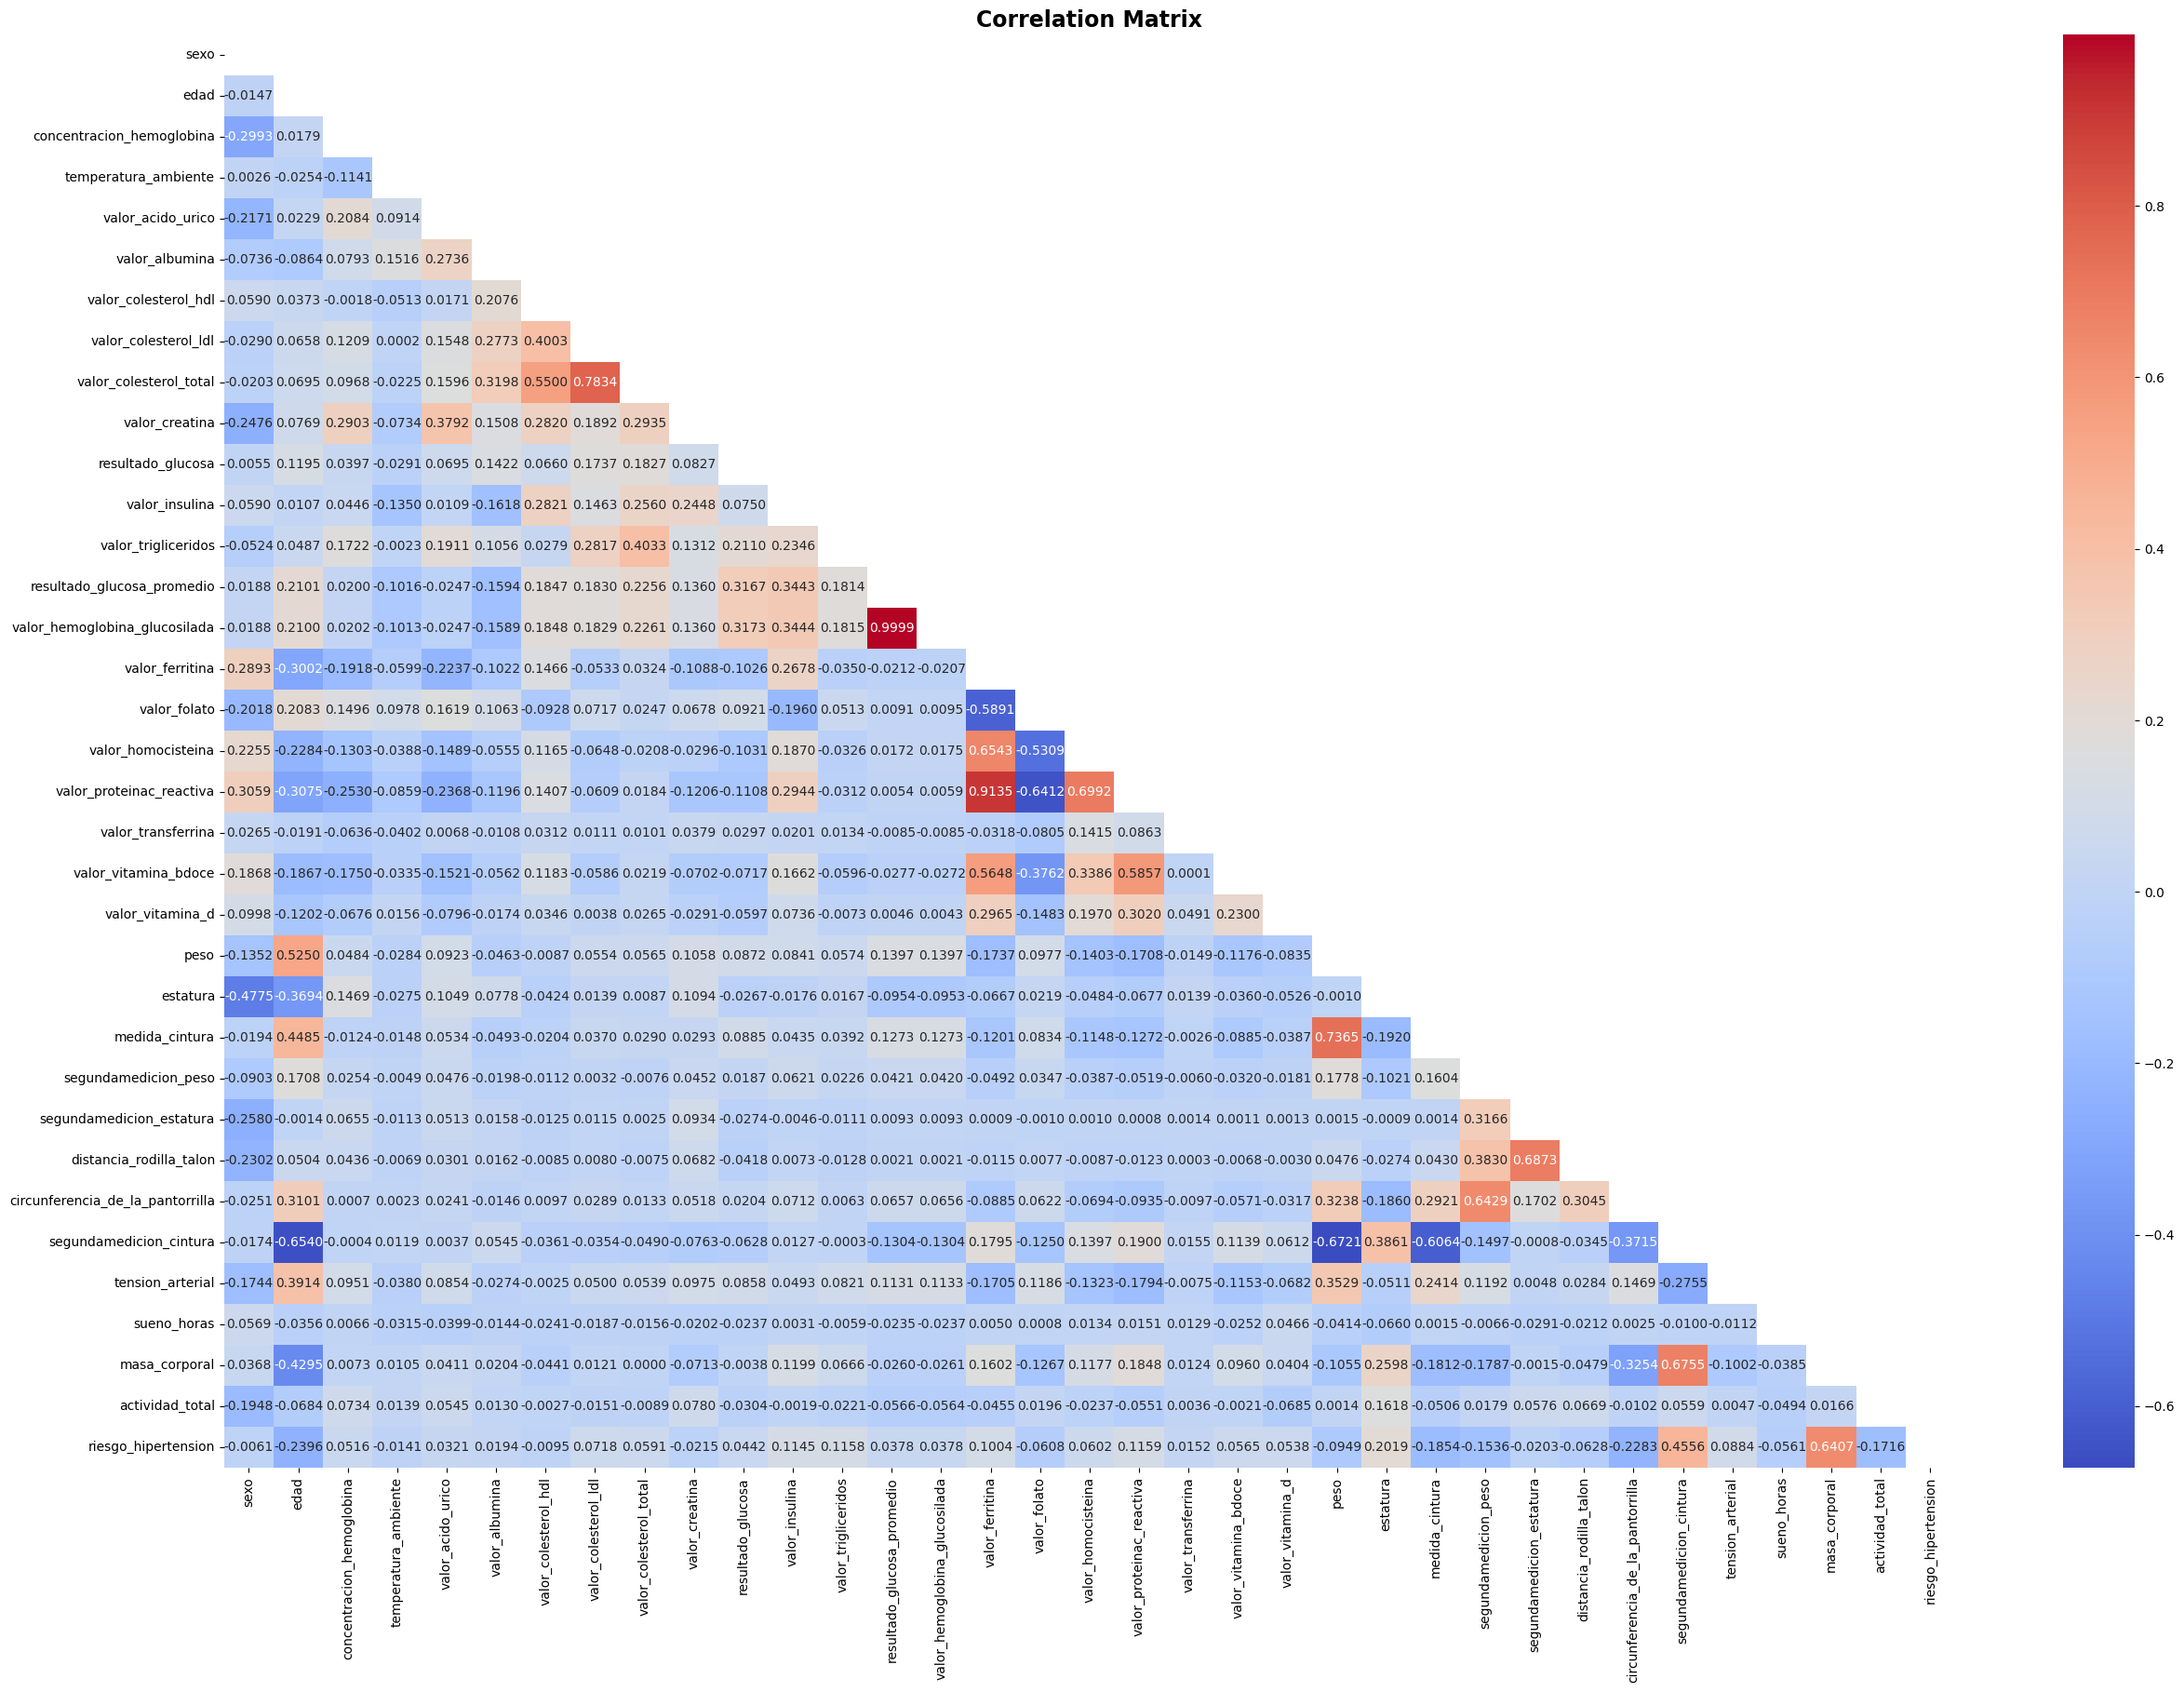

In [11]:
corr_matrix = data.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (30,20))
sns.heatmap(corr_matrix, cmap = "coolwarm", annot = True, fmt = ".4f", mask = mask, annot_kws = {'fontsize':10},ax = ax)
ax.set_title("Correlation Matrix", fontsize = 17, fontweight = "bold",color = "black")
fig.show()

In [22]:
X = data.drop("riesgo_hipertension", axis = 1)
y = data["riesgo_hipertension"]


SEED = 42

X_train, X_test, y_train, y_test = tts(X, y,
                                      test_size = 0.3,
                                      random_state = SEED)

In [13]:
lr = LogisticRegression(random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
et = ExtraTreesClassifier(random_state = SEED)
xgb = XGBClassifier(random_state = SEED)
lgbm = LGBMClassifier(random_state = SEED, class_weight = "balanced")
cb = CatBoostClassifier(random_state = SEED, auto_class_weights = "SqrtBalanced", verbose = 0)

In [14]:
# Training !!!

MODELS = [lr, rf, et, xgb, lgbm, cb]

accuracy_train = {}
accuracy_test = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train[name] = accuracy_score(y_train.squeeze(), y_pred_train)
    accuracy_test[name] = accuracy_score(y_test.squeeze(), y_pred_test)
    print(f"* {name} finished")

  0%|          | 0/6 [00:00<?, ?it/s]

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


* LogisticRegression finished
* RandomForestClassifier finished
* ExtraTreesClassifier finished
* XGBClassifier finished
[LightGBM] [Info] Number of positive: 1967, number of negative: 1087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 3054, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

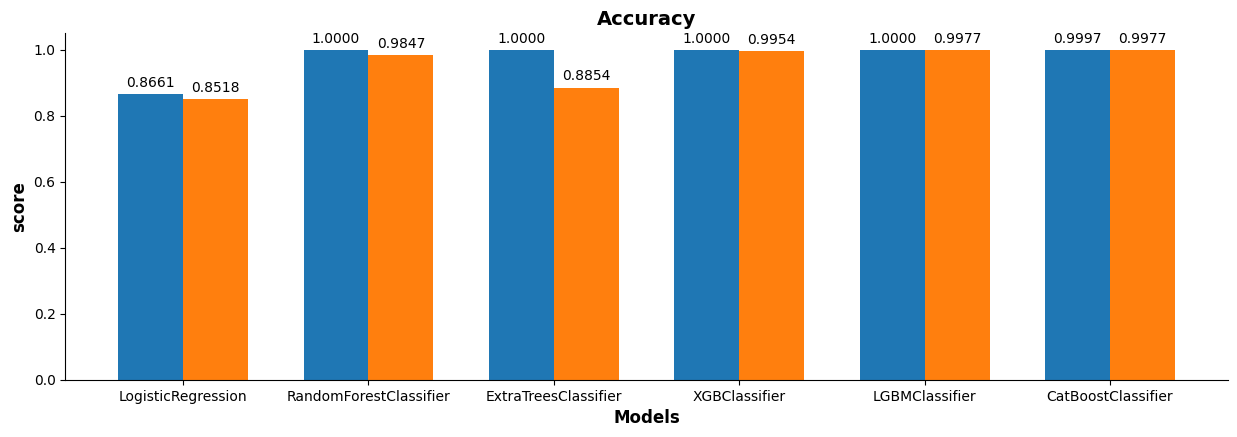

In [15]:
# We visualize the metric on both the training and testing set of each model.
metric_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index').rename(columns = {0:'train'})
metric_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index').rename(columns = {0:'test'})

df_metric = pd.concat([metric_train, metric_test], axis = 1)

labels = df_metric.index.to_list()
values_train = df_metric.iloc[:, 0]
values_test = df_metric.iloc[:, 1]

x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots(figsize = (15, 4.5))

rects1 = ax.bar(x = x - width/2, height = values_train, width = width)
rects2 = ax.bar(x = x + width/2, height = values_test, width = width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Accuracy", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Models", fontsize = 12, fontweight = "bold")
ax.set_ylabel("score", fontsize = 12, fontweight = "bold")

ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{height:.4f}',
                    xy = (rect.get_x() + rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = "offset points",
                    ha = "center",
                    va = "bottom")

autolabel(rects1)
autolabel(rects2)
fig.show()

In [16]:
model = LGBMClassifier(random_state = SEED)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1967, number of negative: 1087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4750
[LightGBM] [Info] Number of data points in the train set: 3054, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644073 -> initscore=0.593088
[LightGBM] [Info] Start training from score 0.593088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

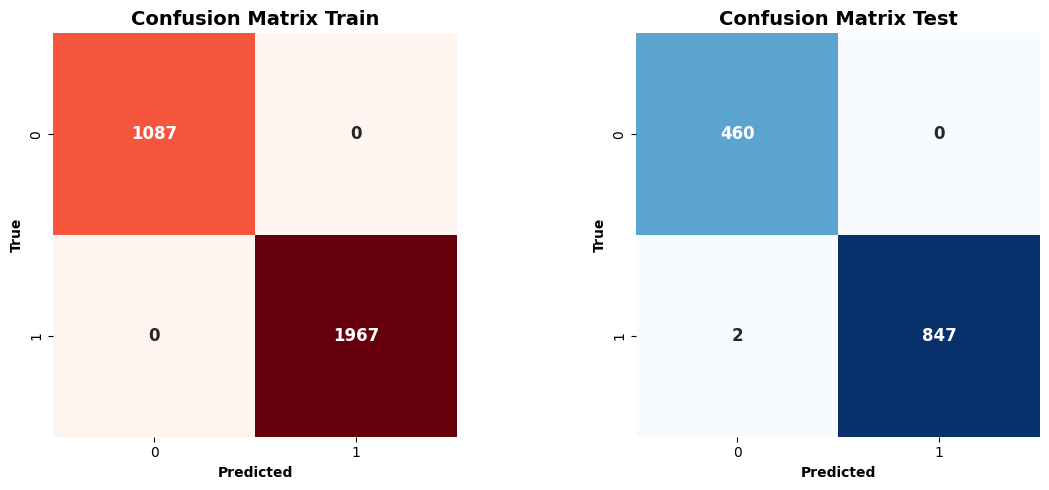

In [17]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train.squeeze(), y_pred_train)
conf_matrix_test = confusion_matrix(y_test.squeeze(), y_pred_test)

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax = ax.flat

sns.heatmap(conf_matrix_train, cmap = "Reds", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[0])
ax[0].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_ylabel("True", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_title("Confusion Matrix Train", fontsize = 14, fontweight = "bold", color = "black")

sns.heatmap(conf_matrix_test, cmap = "Blues", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[1])
ax[1].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_ylabel("True", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_title("Confusion Matrix Test", fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


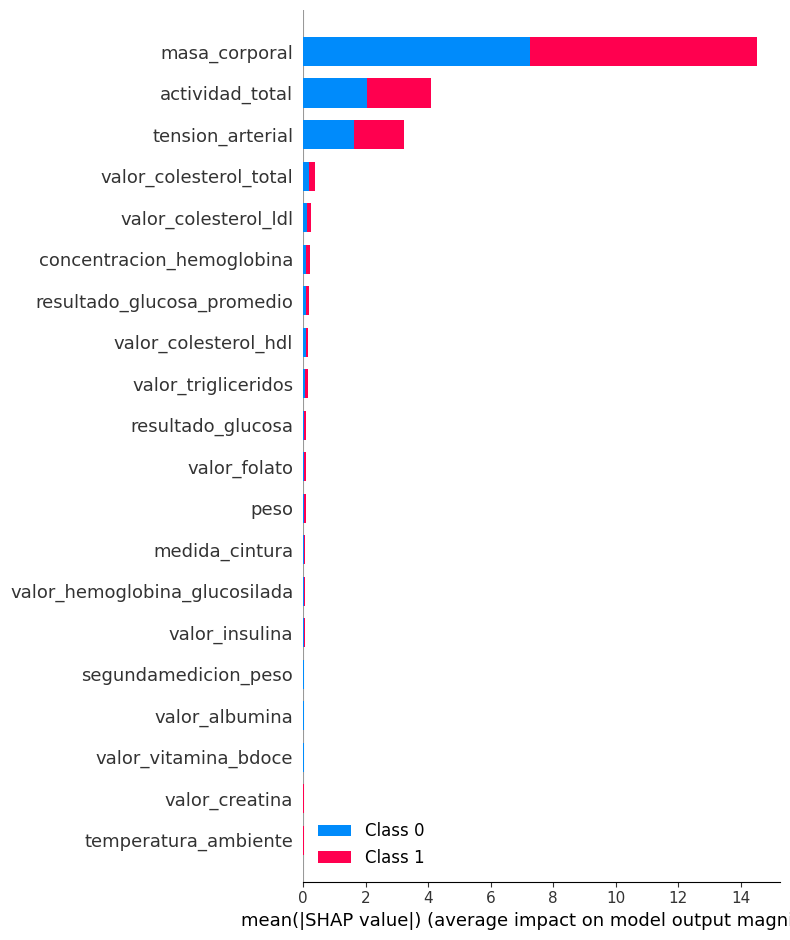

In [19]:
shap.summary_plot(shap_values, X)